<a href="https://colab.research.google.com/github/Zukui/CHE358_python/blob/master/02e_summary_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary example for linear regression

In [0]:
import numpy as np
import matplotlib.pyplot as plt 


## data

In [26]:
data =np.array([[240,	25,	24,	91,	100],
	              [236,	31,	21,	90,	95],
	              [270,	45,	24,	88,	110],
	              [274,	60,	25,	87,	88],
        	      [301,	65,	25,	91,	94],
        	      [316,	72,	26,	94,	99],
	              [300,	80,	25,	87,	97],
	              [296,	84,	25,	86,	96],
	              [267,	75,	24,	88,	110],
	              [276,	60,	25,	91,	105],
	              [288,	50,	25,	90,	100],
	              [261,	38,	23,	89,	98]])


Y = data[:,0]
n = len(Y)
k = 4
p = 5
X = np.concatenate((np.ones((n,1)), data[:,1:5]),axis=1)
print(X)

[[  1.  25.  24.  91. 100.]
 [  1.  31.  21.  90.  95.]
 [  1.  45.  24.  88. 110.]
 [  1.  60.  25.  87.  88.]
 [  1.  65.  25.  91.  94.]
 [  1.  72.  26.  94.  99.]
 [  1.  80.  25.  87.  97.]
 [  1.  84.  25.  86.  96.]
 [  1.  75.  24.  88. 110.]
 [  1.  60.  25.  91. 105.]
 [  1.  50.  25.  90. 100.]
 [  1.  38.  23.  89.  98.]]


## least square estimation

In [12]:
C = np.linalg.inv(X.T@X)
hat_theta = C@X.T@Y
print(hat_theta)

[-123.13124627    0.75728909    7.51878396    2.48307855   -0.48113523]


## significance test

In [38]:
hat_Y = X@hat_theta
bar_y = sum(Y)/n
e = Y-hat_Y;

SST = sum((Y-bar_y)**2)
SSR = sum((hat_Y-bar_y)**2)
SSE = e.T@e;

MSE = SSE/(n-p);
MSR = SSR/k;
alpha = 0.05;

from scipy.stats import f as f_dist
f = f_dist.ppf(1-alpha,k, n-p)
F0 = MSR/MSE    # ANOVA
p_value = 1 - f_dist.cdf(F0, k, n-p)
print(F0)
print(f)
print(p_value)



10.078310239375302
4.120311726897633
0.004960483270962435


## confidence interval of parameters

In [36]:
from scipy.stats import t as t_dist
t = t_dist.ppf(1-alpha/2,n-p)
CI_theta_low = hat_theta-t*np.sqrt(MSE*np.diag(C))  # confidence intervals on parameters
CI_theta_high = hat_theta+t*np.sqrt(MSE*np.diag(C))
print(CI_theta_low)
print(CI_theta_high)

[-4.94982734e+02  9.73466313e-02 -1.96364640e+00 -1.79543852e+00
 -1.79391356e+00]
[248.720241     1.41723155  17.00121431   6.76159563   0.8316431 ]


## R2

In [35]:
R2 = SSR/SST   # R square
R_adj2 = 1-SSE/(n-p)/(SST/(n-1))  # R adjusted square

print(R2)
print(R_adj2)

0.8520498731785177
0.7675069435661507


## confidence interval of mean response and prediction

In [24]:
# confidence interval on the mean response and predictions at all given x points
X0 = np.array([1, 75, 24, 90, 98]).reshape(1,p)
m = 1
hat_mu_Y = X0@hat_theta
CI_mu_Y_low = np.zeros((m,1))
CI_mu_Y_high = np.zeros((m,1))
CI_Y0_low = np.zeros((m,1))
CI_Y0_high = np.zeros((m,1))
for i in range(m):
    CI_mu_Y_low[i] =  hat_mu_Y[i] - t*np.sqrt(MSE*X0[i,:]@C@X0[i,:].T);
    CI_mu_Y_high[i] = hat_mu_Y[i] + t*np.sqrt(MSE*X0[i,:]@C@X0[i,:].T);
    CI_Y0_low[i] =  hat_mu_Y[i] - t*np.sqrt(MSE*(1+X0[i,:]@C@X0[i,:].T));
    CI_Y0_high[i] = hat_mu_Y[i] + t*np.sqrt(MSE*(1+X0[i,:]@C@X0[i,:].T));

print(CI_Y0_low)
print(CI_Y0_high)


[[257.2715077]]
[[323.61262736]]


## residual analysis

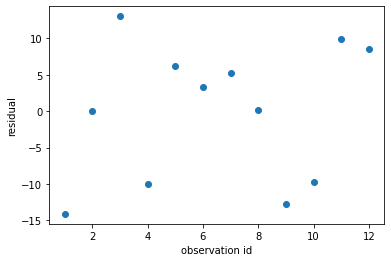

In [33]:
plt.scatter(np.arange(1, n+1, 1), e) 
plt.xlabel('observation id')
plt.ylabel('residual')
plt.show()

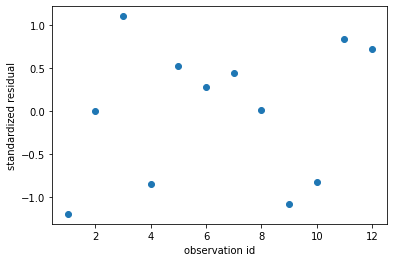

In [30]:
std_e = e/np.sqrt(MSE)

plt.scatter(np.arange(1, n+1, 1), std_e) 
plt.xlabel('observation id')
plt.ylabel('standardized residual')
plt.show()

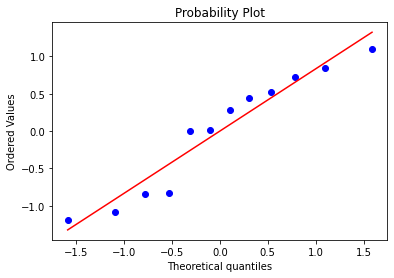

In [28]:
import scipy.stats as stats
import pylab 
stats.probplot(std_e, dist="norm", plot=pylab)
pylab.show()

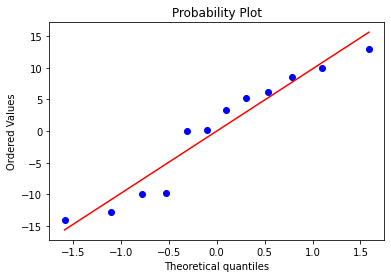

In [32]:
stats.probplot(e, dist="norm", plot=pylab)
pylab.show()

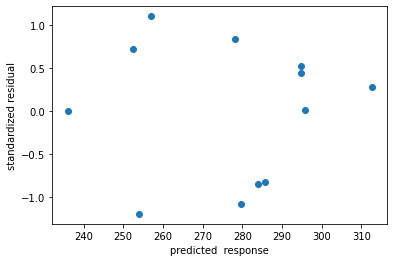

In [31]:
plt.scatter(hat_Y, std_e) 
plt.xlabel('predicted  response')
plt.ylabel('standardized residual')
plt.show()

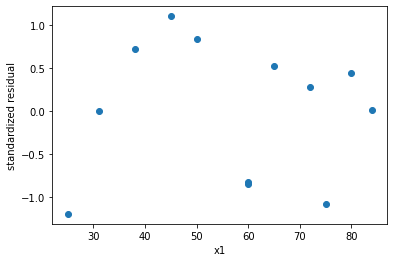

In [34]:
plt.scatter(X[:,1], std_e) 
plt.xlabel('x1')
plt.ylabel('standardized residual')
plt.show()